# **Monte Carlo simulation of hydraulic conductivity**

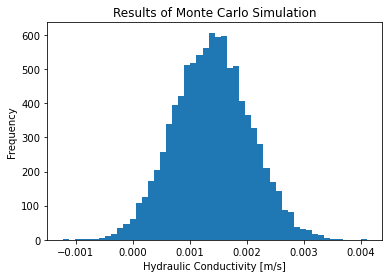

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Known values for hydraulic conductivity, m/s
known_values = np.array([1.2E-3, 2.3E-4, 1.5E-3, 1.8E-3, 2.2E-3])

# We can use these values to estimate the parameters for a normal distribution
mean = np.mean(known_values)
std_dev = np.std(known_values)

# Number of simulations
n_simulations = 10000

# Create an empty list to store the results
results = []

# Perform the Monte Carlo simulation
for _ in range(n_simulations):
    # Draw a random value from the normal distribution
    simulation = np.random.normal(mean, std_dev)
    
    # Add the result to the list
    results.append(simulation)

# Plot the results
plt.hist(results, bins=50, density=True)
plt.xlabel('Hydraulic Conductivity [m/s]')
plt.ylabel('Frequency')
plt.title('Results of Monte Carlo Simulation')
plt.show()


**Check for normality of data**

KS-statistic = 0.1900186353056212
p-value = 0.9773016991584055


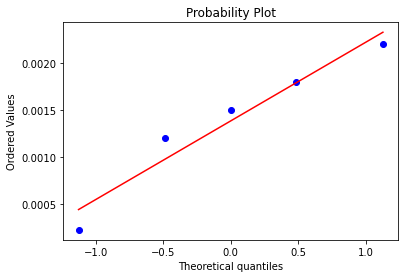

In [38]:
import scipy.stats as stats
import pylab

# Perform the Kolmogorov-Smirnov test for normality
ks_statistic, p_value = stats.kstest(known_values, 'norm', args=(mean, std_dev))

print(f'KS-statistic = {ks_statistic}')
print(f'p-value = {p_value}')

# If the p-value is greater than 0.05, we do not reject the hypothesis that the data follows a normal distribution

# Generate a QQ-plot
stats.probplot(known_values, dist="norm", plot=pylab)
pylab.show()


**Statistics**

Mean: 1.39E-03
Median: 1.39E-03
95% Confidence Interval: [1.04E-04, 2.70E-03]


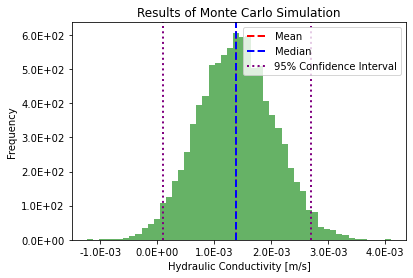

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set numpy print options
np.set_printoptions(precision=2, suppress=True, formatter={'float': '{:0.2E}'.format})

# Calculate the mean and median
mean_value = np.mean(results)
median_value = np.median(results)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(results, [2.5, 97.5])

# Print the results in scientific notation
print(f'Mean: {mean_value:.2E}')
print(f'Median: {median_value:.2E}')
print(f'95% Confidence Interval: [{confidence_interval[0]:.2E}, {confidence_interval[1]:.2E}]')

# Plot the histogram of the results
plt.hist(results, bins=50, density=True, alpha=0.6, color='g')

# Plot the mean, median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2)

# Plot the confidence interval
plt.axvline(confidence_interval[0], color='purple', linestyle='dotted', linewidth=2)
plt.axvline(confidence_interval[1], color='purple', linestyle='dotted', linewidth=2)

# Add a legend
plt.legend({'Mean':f'{mean_value:.2E}', 'Median':f'{median_value:.2E}', '95% Confidence Interval':f'[{confidence_interval[0]:.2E}, {confidence_interval[1]:.2E}]'})

# Format the x and y axis to scientific notation
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1E}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1E}'.format(x)))


plt.xlabel('Hydraulic Conductivity [m/s]')
plt.ylabel('Frequency')
plt.title('Results of Monte Carlo Simulation')
plt.show()


**Example use of data for sensitivity analysis in groundwater modeling, to be updated with actual model**

In [42]:
def groundwater_model(hydraulic_conductivity):
    # This is a placeholder for your actual model.
    # Replace this with the function that runs your model.
    flow_rate = hydraulic_conductivity * 100  # This is a dummy equation
    return flow_rate

# Run the model with the minimum, maximum, and mean hydraulic conductivity
min_result = groundwater_model(np.min(results))
max_result = groundwater_model(np.max(results))
mean_result = groundwater_model(np.mean(results))

print(f'Min result: {min_result}, Max result: {max_result}, Mean result: {mean_result}')


Min result: -0.12352524312871298, Max result: 0.41063136171223674, Mean result: 0.1387270126449642
